In [1]:
import json
from pathlib import Path

from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np

from contact_graspnet.utils.misc import get_root_dir
from contact_graspnet.utils.visualization import mlab_pose_vis
from contact_graspnet.datatypes import GraspCam

2023-02-20 21:30:53.657544: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 21:30:55.147253: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/moritz/catkin_ws/devel/lib:/opt/ros/noetic/lib:/home/moritz/.mujoco/mujoco210/bin:/home/moritz/mambaforge/envs/contact/lib/:/home/moritz/mambaforge/envs/contact/lib/
2023-02-20 21:30:55.147619: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No

In [2]:
### plot all original images ###

# ycb_path = Path.home() / "Documents" / "ycb_sim_data_1"
# obj_names = sorted([p.name for p in ycb_path.iterdir()])

# for i, name in enumerate(obj_names):
#     print(f"{i}: {name}")

#     img = np.load(ycb_path / name)["rgb_img"]

#     plt.imshow(img)

#     plt.show()

In [3]:
result_paths = [
    get_root_dir() / "data" / "results" / "ycb_sim_data_1",
    # get_root_dir() / "data" / "results" / "ycb_sim_data_2",
]

result_names = sorted([p.name for p in result_paths[0].iterdir() if p.is_dir()])

In [10]:
### show the mlab visualization of all results in a folder ###

result_path = result_paths[0]

for result_name in result_names:
    print(result_name)

    mlab_pose_vis(
        np.load(result_path / result_name / "full_pc.npy"),
        [
            GraspCam(**d)
            for d in json.load(open(result_path / result_name / "data.json"))[
                "grasps_cam"
            ]
        ],
        np.load(result_path / result_name / "full_pc_colors.npy"),
    )


001_master_chef_can
002_cracker_box


Caught a Ctrl-C within python, exiting program.


007_pudding_box
008_gelatin_box
023_sponge
036_adjustable_wrench
044_mini_soccer_ball
045_softball
ycb_sim_data_1
samples with no grasps: 6


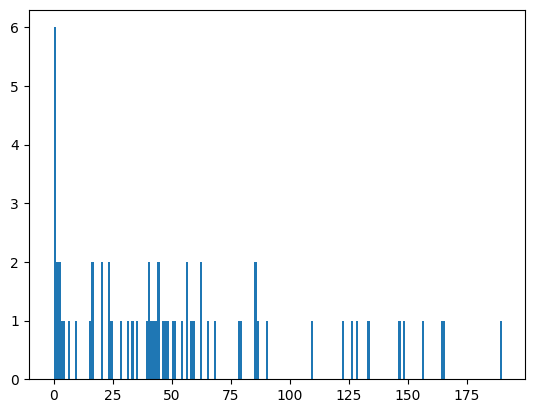

In [9]:
### histograms of the number of grasps per sampe

for result_path in result_paths:
    n_grasps = []
    for result_name in result_names:
        with open(result_path / result_name / "data.json") as f:
            data = json.load(f)

        n_grasps.append(len(data["grasps_cam"]))

        if len(data["grasps_cam"]) == 0:
            print(result_name)

    n_grasps = np.array(n_grasps)

    plt.hist(n_grasps, bins=np.arange(-1, max(n_grasps)+1))

    print(result_path.name)
    print(f"samples with no grasps: {np.sum(n_grasps == 0)}")

FileNotFoundError: [Errno 2] No such file or directory: '/home/moritz/Documents/ContactGraspnetBenchmark/contact_graspnet/data/results/ycb_sim_data_1/001_master_chef_can/all_grasps.png'

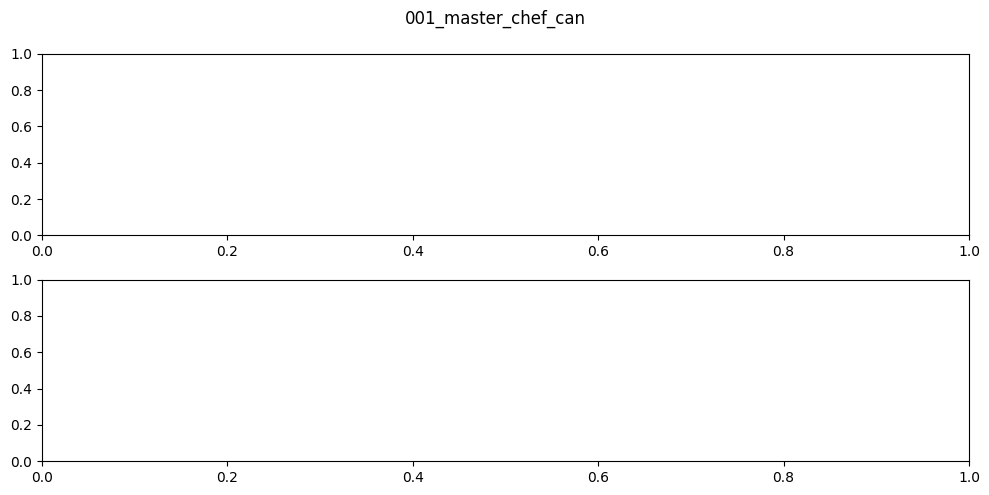

In [6]:

for result_name in result_names:
    fig, axes = plt.subplots(2, len(result_paths), figsize=(10, 5))
    fig.suptitle(result_name)
    fig.tight_layout()

    for i, result_path in enumerate(result_paths):
        all_grasps = mpl.image.imread(result_path / result_name / "all_grasps.png")
        best_grasp = mpl.image.imread(result_path / result_name / "best_grasp.png")

        axes[i][0].imshow(all_grasps)
        axes[i][0].set_title("all grasps")

        axes[i][1].imshow(best_grasp)
        axes[i][1].set_title("best grasp")

    plt.show()
